In [1]:
import pandas as pd,numpy as np,seaborn as sns,matplotlib.pyplot as plt

In [20]:
#Uncover the factors that lead to employee attrition and explore important questions such as:
#1. Show a breakdown of distance from home by job role and attrition.
#2. Compare average monthly income by education and attrition.

In [2]:
attrition = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [22]:
#Data preparation and cleaning
nan_df = attrition[attrition.isna().any(axis = 1)]
nan_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [23]:
fil_df = attrition[attrition['Department'].str[0:1] != 'De']
fil_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [24]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [28]:
attrition.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [33]:
objects = attrition[['Over18','OverTime','MaritalStatus','Gender','JobRole','EducationField','Department','BusinessTravel']]
df_obj = objects.columns
df_obj

Index(['Over18', 'OverTime', 'MaritalStatus', 'Gender', 'JobRole',
       'EducationField', 'Department', 'BusinessTravel'],
      dtype='object')

In [34]:
list(enumerate(df_obj))

[(0, 'Over18'),
 (1, 'OverTime'),
 (2, 'MaritalStatus'),
 (3, 'Gender'),
 (4, 'JobRole'),
 (5, 'EducationField'),
 (6, 'Department'),
 (7, 'BusinessTravel')]

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-p

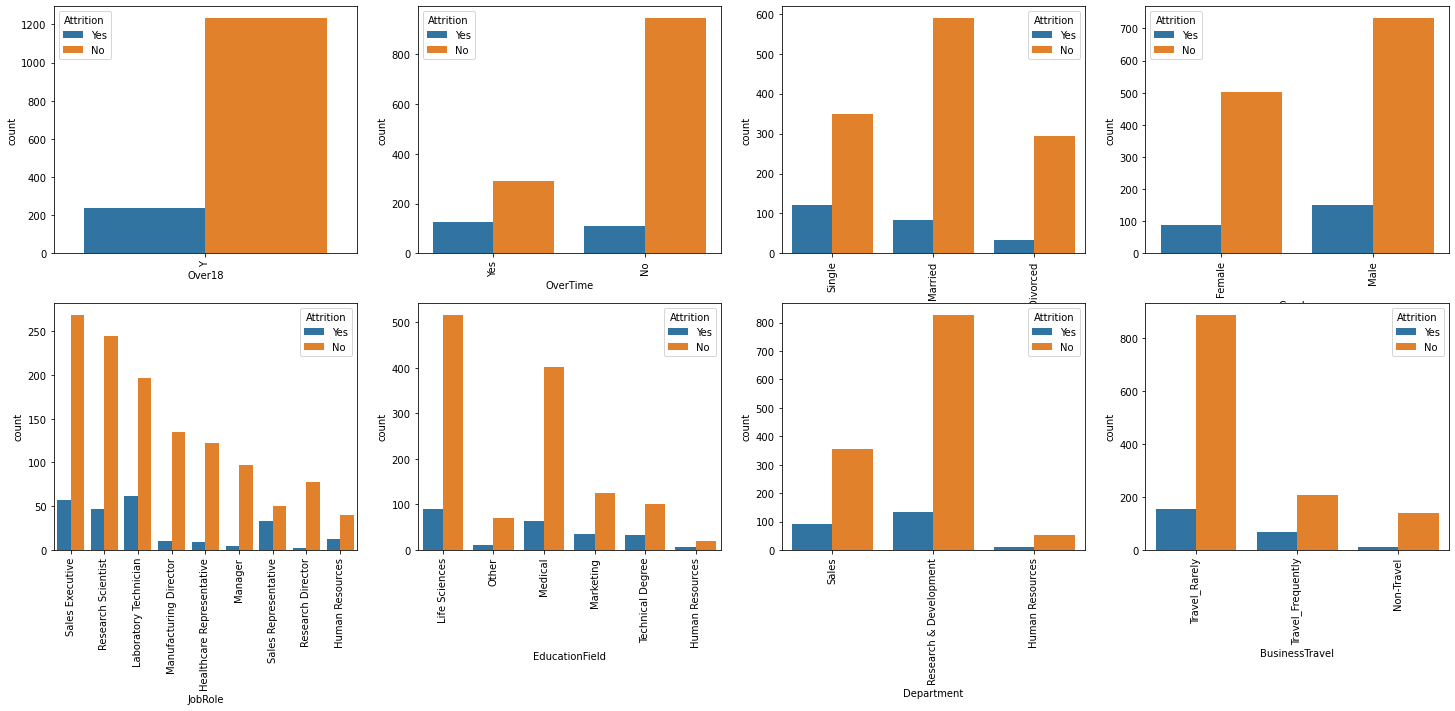

In [43]:
plt.figure(figsize = (25,10))
for x in enumerate(df_obj):
    plt.subplot(2,4,x[0]+1)
    sns.countplot(x[1], hue = 'Attrition', data = attrition)
    plt.xticks(rotation = 90)

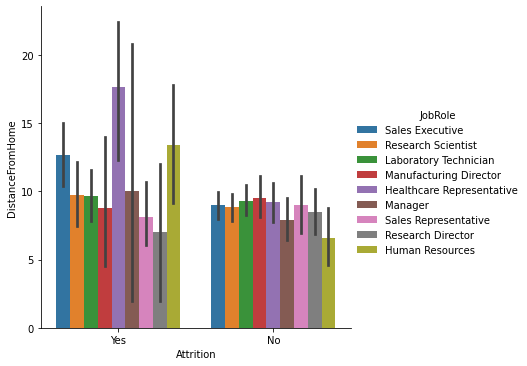

In [46]:
#1. Show a breakdown of distance from home by job role and attrition.
sns.catplot(x = 'Attrition', y = 'DistanceFromHome', hue = 'JobRole', data = attrition, kind = 'bar')

In [48]:
#2. Compare average monthly income by education and attrition.
attrition[['MonthlyIncome','Education']]

,MonthlyIncome,Education
0,5993,2
1,5130,1
2,2090,2
3,2909,4
4,3468,1
...,...,...
1465,2571,2
1466,9991,1
1467,6142,3
1468,5390,3


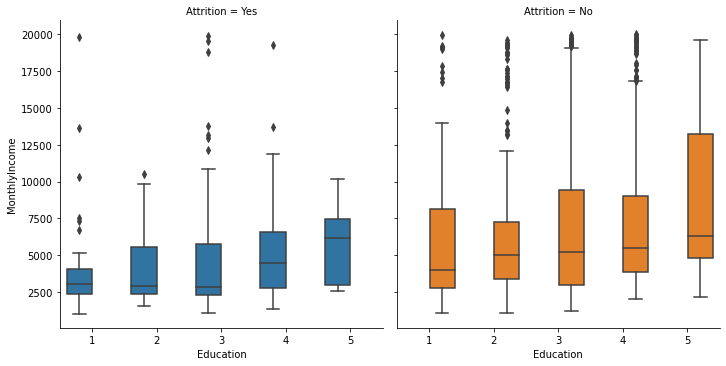

In [82]:
sns.catplot(x = 'Education' ,y = 'MonthlyIncome', data = attrition, hue = 'Attrition', kind = 'box', col = 'Attrition' )

In [62]:
attrition[['JobInvolvement','Department']]

,JobInvolvement,Department
0,3,Sales
1,2,Research & Development
2,2,Research & Development
3,3,Research & Development
4,3,Research & Development
...,...,...
1465,4,Research & Development
1466,2,Research & Development
1467,4,Research & Development
1468,2,Sales


(array([0, 1, 2]),
 [Text(0, 0, 'Sales'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Human Resources')])

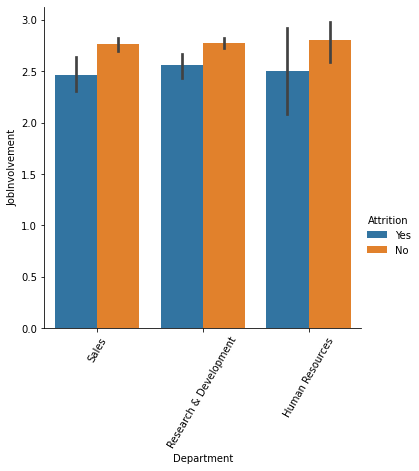

In [83]:
sns.catplot(x = 'Department', y = 'JobInvolvement', data = attrition, hue = 'Attrition', kind = 'bar')
plt.xticks(rotation = 60)

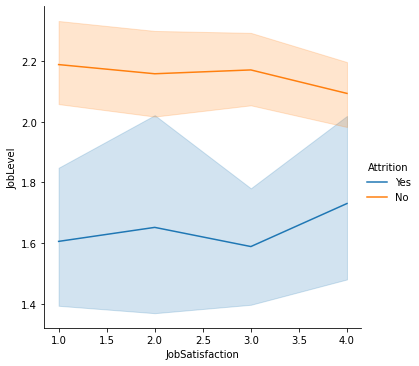

In [96]:
sns.relplot(x = 'JobSatisfaction', y ='JobLevel',data = attrition, hue = 'Attrition',kind = 'line',)

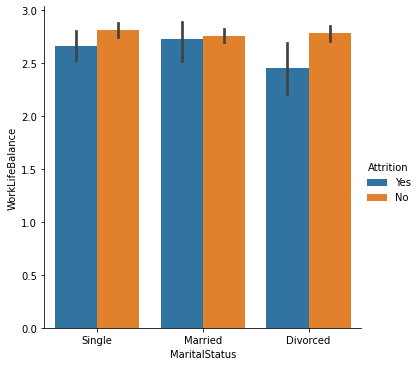

In [4]:
sns.catplot(x = 'MaritalStatus', y = 'WorkLifeBalance', hue = 'Attrition', data = attrition, kind = 'bar')

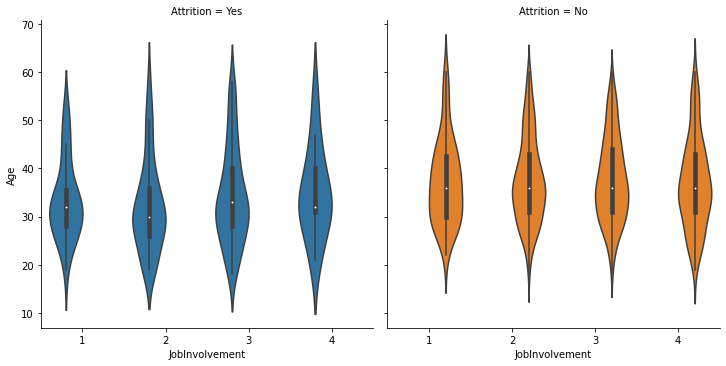

In [11]:
sns.catplot(x = 'JobInvolvement', y = 'Age', hue = 'Attrition', data = attrition, kind = 'violin', col = 'Attrition')